In [ ]:
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd

In [ ]:
df=pd.read_csv('/content/winetest.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df['type']=pd.get_dummies(df['type'],drop_first=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('quality',axis=1)
y=df['quality']
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


In [ ]:
x.shape

torch.Size([6497, 12])

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self,n_features,h1):
    super(LogisticRegression,self).__init__()
    self.layer1=nn.Linear(n_features,h1)
    self.layer2=nn.Linear(h1,1)
    self.softmax=nn.Softmax(dim=1)

  def forward(self,x):
    out=F.relu(self.layer1(x))
    out=F.relu(self.layer2(out))
    out=self.softmax(out)
    return out

In [ ]:
def train(model,X,y,epocs=50,optimizer=None,loss_fn=None,bsz=20,seed=20):
  torch.manual_seed(seed)
  cost=[]
  for epoch in range(epocs):
    suffle_idx=torch.randperm(y.size(0))
    batches =torch.split(suffle_idx,bsz)
    for batch_idx in batches:
      ###1. Compute the output
      yhat=model(X[batch_idx])

      ###2. Compute the error
    
      loss=loss_fn(yhat,y[batch_idx].unsqueeze(dim=1))

      ###3. Compute the Gradient
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Parameters
      optimizer.step()

      ### Log the loss
    with torch.no_grad():
      yhat=model(X)
      curr_loss=loss_fn(yhat,y.long())
      print('Epoc:%3d ' % epoch,end="")
      print('BCE %.2f' % curr_loss)
      cost.append(curr_loss)
  return cost


In [ ]:
model=LogisticRegression(n_features=X_train.size(1),h1=7)
optimizer=torch.optim.Adam(model.parameters(),lr=.001)
loss_fn=nn.MSELoss()

In [ ]:
cost =train(model,X_train,y_train,optimizer=optimizer,loss_fn=loss_fn)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([4547])) that is different to the input size (torch.Size([4547, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoc:  0 BCE nan
Epoc:  1 BCE nan
Epoc:  2 BCE nan
Epoc:  3 BCE nan
Epoc:  4 BCE nan
Epoc:  5 BCE nan
Epoc:  6 BCE nan
Epoc:  7 BCE nan
Epoc:  8 BCE nan
Epoc:  9 BCE nan
Epoc: 10 BCE nan
Epoc: 11 BCE nan
Epoc: 12 BCE nan
Epoc: 13 BCE nan
Epoc: 14 BCE nan
Epoc: 15 BCE nan
Epoc: 16 BCE nan
Epoc: 17 BCE nan
Epoc: 18 BCE nan
Epoc: 19 BCE nan
Epoc: 20 BCE nan
Epoc: 21 BCE nan
Epoc: 22 BCE nan
Epoc: 23 BCE nan
Epoc: 24 BCE nan
Epoc: 25 BCE nan
Epoc: 26 BCE nan
Epoc: 27 BCE nan
Epoc: 28 BCE nan
Epoc: 29 BCE nan
Epoc: 30 BCE nan
Epoc: 31 BCE nan
Epoc: 32 BCE nan
Epoc: 33 BCE nan
Epoc: 34 BCE nan
Epoc: 35 BCE nan
Epoc: 36 BCE nan
Epoc: 37 BCE nan
Epoc: 38 BCE nan
Epoc: 39 BCE nan
Epoc: 40 BCE nan
Epoc: 41 BCE nan
Epoc: 42 BCE nan
Epoc: 43 BCE nan
Epoc: 44 BCE nan
Epoc: 45 BCE nan
Epoc: 46 BCE nan
Epoc: 47 BCE nan
Epoc: 48 BCE nan
Epoc: 49 BCE nan


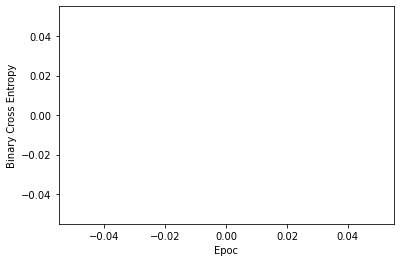

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoc')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
with torch.no_grad():
  train_pred=model(X_train)
  #train_pred
  train_acc=(torch.argmax(train_pred,dim=1)==y_train).float().mean()
  print('Training Accuracy: %.2f' %train_acc)
  test_pred=model(X_test)
  test_acc=(torch.argmax(test_pred,dim=1)==y_test).float().mean()
  print('Testing Accuracy: %.2f' %test_acc)

Training Accuracy: 0.00
Testing Accuracy: 0.00
